In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
df_train = pd.read_csv(r"train.csv")
x_test = pd.read_csv(r"test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Training Data Columns
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:

#Training Data Description for Quantitative Columns
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Training Data Description for Categorical Columns
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Foo, Mr. Choong",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
#More Information about Training Data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# show which columns have Nan values (Age, Cabin, Embarked)

miss_columns = [i for i in df_train.columns if df_train[i].isna().any()]
miss_columns

['Age', 'Cabin', 'Embarked']

In [8]:
# create X_train and Y_train

X_train = df_train.drop('Survived', axis=1)
y_train = pd.DataFrame(df_train['Survived'], columns=['Survived'])


In [9]:
def numerical(data):
    #Numerical and Non_numerical Columns
    numerical_columns = data.select_dtypes(include=['number']).columns.values
    non_numerical_columns = data.select_dtypes(exclude=['number']).columns.values
    return numerical_columns, non_numerical_columns

In [10]:
#Numerical and Non_numerical Columns
numerical_columns, non_numerical_columns = numerical(X_train)
print('numiric_columns:',numerical_columns)
print('non_numiric_columns:',non_numerical_columns)

numiric_columns: ['PassengerId' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']
non_numiric_columns: ['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


In [11]:
def cat_quant(data):
    categorical = list()
    quantitative = []
    for i in data.columns:

        if len(data[i].unique()) > 10:
            quantitative.append(i)

        else:
            categorical.append(i)
            
    return quantitative, categorical

In [12]:
#Quantitative and Categorical Columns
quantitative,  categorical= cat_quant(X_train)

print('Quantitative Columns:',quantitative)
print('Categorical Columns:',categorical)

Quantitative Columns: ['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin']
Categorical Columns: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


In [13]:
#Percentage of survivors in each Categorical column
for i in categorical:
    if i in ['Name', 'Cabin', 'Ticket']:
        continue
    percent = df_train[[i, 'Survived']].groupby([i], as_index=False).mean()
    print(percent)
    print('-'*40)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
----------------------------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908
----------------------------------------
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
----------------------------------------
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
----------------------------------------
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
----------------------------------------


# **Training data visualization**

In [14]:
def chart(data,columns):
    data_copy = data.copy()
    for i in columns:
        #Ploing Bar
        h = data_copy[i].value_counts()
        a = list(data_copy[i].unique())
        #Removing nan values
        if a.__contains__(np.nan):
            a.remove(np.nan)
        
        plt.bar(a, h, label=i, width=0.2, edgecolor='k')
        for j, k in zip(a,h):
            plt.text(j, k, k, ha='center', va='bottom')
            plt.text(j, -85, j, ha='center', va='bottom', fontsize=15)
        plt.legend()
        plt.show()
        #-----------------------------------------------------
        #ploting Pie
        plt.pie(h, explode=[0.05 for i in h], labels=a, autopct='%1.1f%%',wedgeprops={'edgecolor':'k'}, shadow=True)
        plt.show()
        print('='*90)

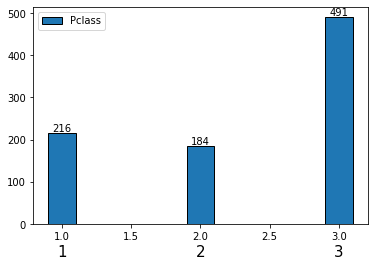

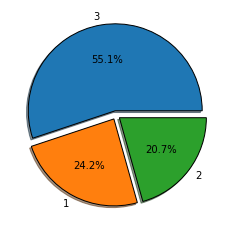

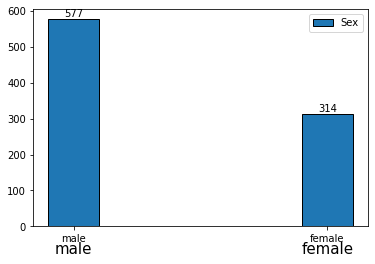

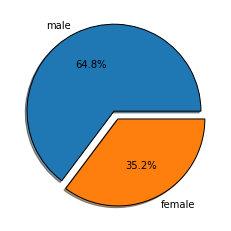

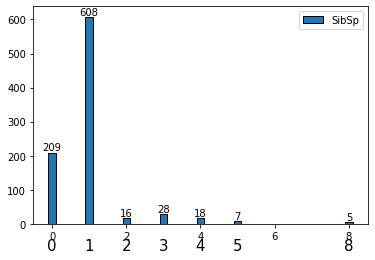

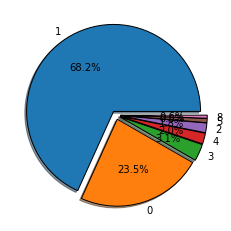

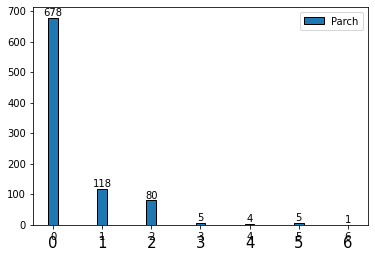

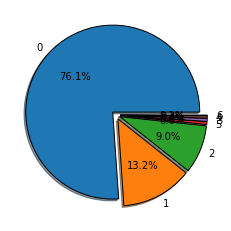

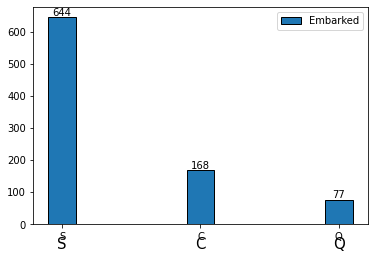

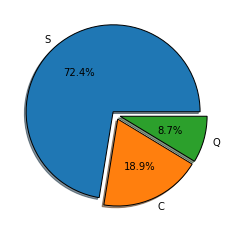

In [15]:
#plot Bar and Pie charts for all Categorical Data
chart(df_train,categorical)

              PassengerId               
count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64


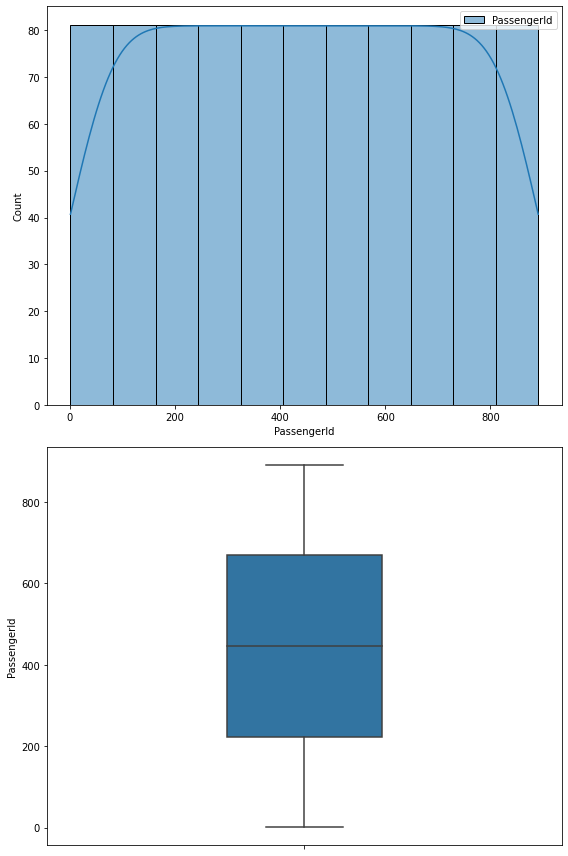

                  Age                   
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


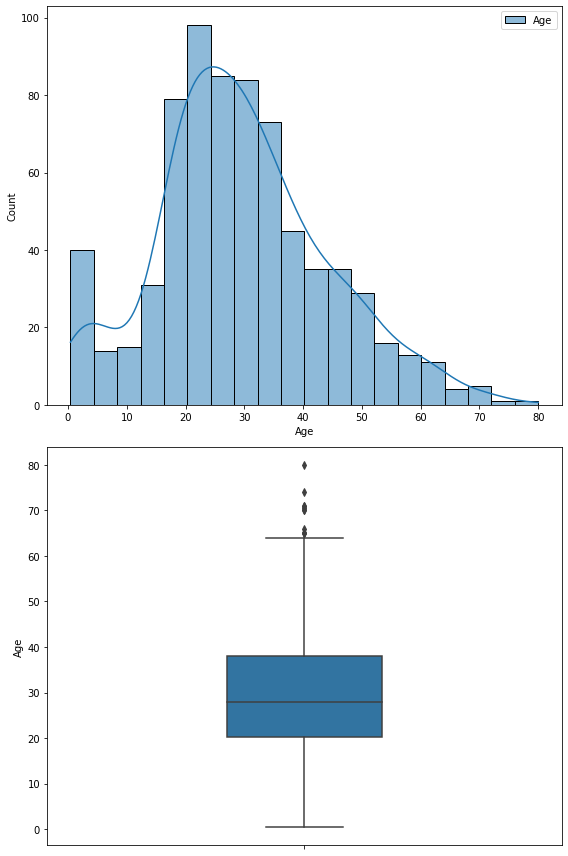

                  Fare                  
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


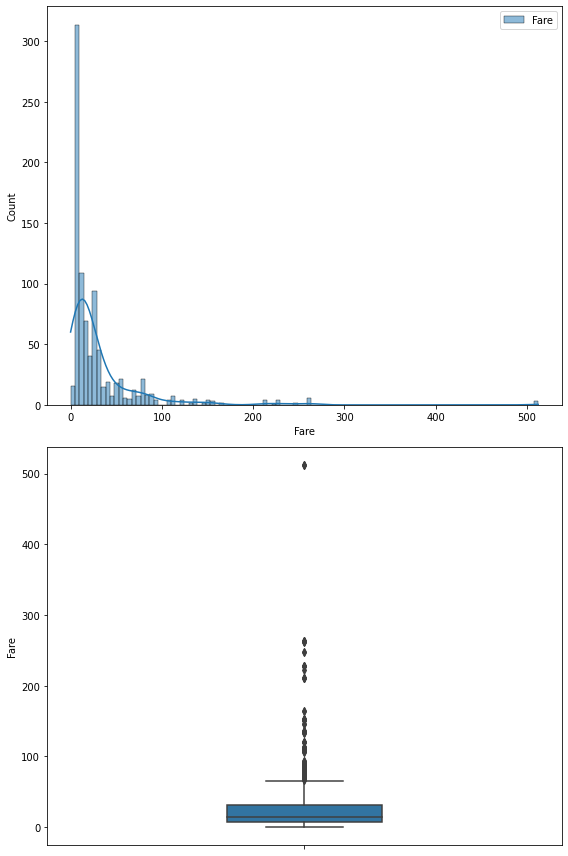

In [22]:
# Histgram and Box char for all 

for i in quantitative:
    if i in numerical_columns:
        print(str(i).center(40))
        print(X_train[i].describe())
        
        # Create a new figure for each plot
        plt.figure(figsize=(8, 12))  # Adjust the figure size as needed
        
        # Create a subplot grid (1 row, 2 columns)
        plt.subplot(2, 1, 1)  # First subplot (histogram)
        sns.histplot(X_train[i], kde=True, label=i)
        plt.legend()
        
        plt.subplot(2, 1, 2)  # Second subplot (box plot)
        sns.boxplot(y=X_train[i], width=0.3)
        
        # Adjust spacing between subplots
        plt.tight_layout()
        
        # Show the plots
        plt.show()
        
        print('=' * 100)


# **Testing Data visualization**

In [23]:
#labels
np.unique(y_train)

array([0, 1], dtype=int64)

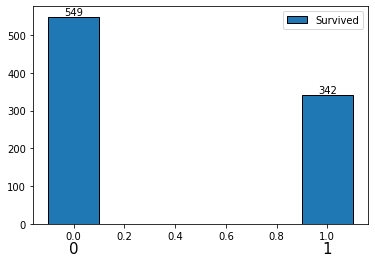

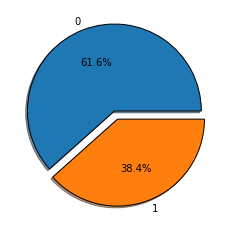

In [24]:
chart(y_train,y_train.columns)

# **Correlation Matrix**

In [28]:
n = np.append(numerical_columns,'Survived')
corr_mat = df_train[n].corr()
corr_mat

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


<AxesSubplot:>

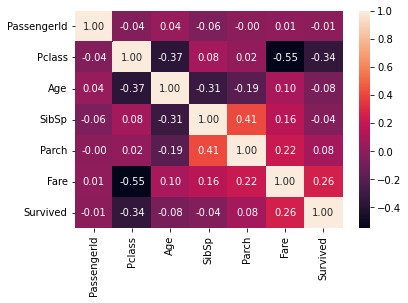

In [30]:
sns.heatmap(corr_mat,annot=True, fmt='.2f', annot_kws={'size':10})

# **Testing Data**

In [32]:
x_test 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [33]:
y_test = pd.read_csv(r'gender_submission.csv')
y_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
try:
    y_test.drop('PassengerID', axis=1, inplace=True)
except:
    pass

y_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [37]:
x_combine = pd.concat([X_train,x_test],axis=0)
x_combine

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [39]:
# Title can be extracted from name

title = []
for i in x_combine['Name']:
    if str(i).split()[1].endswith('.'):
        title.append(str(i).split()[1][:-1])
    elif str(i).split()[2].endswith('.'):
        title.append(str(i).split()[2][:-1])
    else:
        title.append(str(i).split()[3][:-1])

In [40]:
#New Column Called Title
x_combine['Title'] = title
x_combine


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


# **Assume all women survived**

In [28]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived: ", rate_women)

% of women who survived:  0.7420382165605095


In [29]:
men = df_train.loc[df_train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# **Random forest model**

In [30]:
from sklearn.ensemble import RandomForestClassifier

y = df_train['Survived']

feature = ['Pclass','Sex','Age','SibSp','Parch']

X = pd.get_dummies(df_train[feature])
X_test = pd.get_dummies(df_test[feature])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

model.fit(X,y)

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerID': df_test.PassengerId, 'Survived': predictions})

output.to_csv('submission2.csv',index=False) 

# **Logist Regression Model**

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import MinMaxScaler

In [6]:
y = df_train['Survived']

feature = ['Pclass','Sex','Age','SibSp','Parch','Embarked']

X = pd.get_dummies(df_train[feature])
X_test = pd.get_dummies(df_test[feature])

# X = df_train[feature]
# X_test = df_test[feature]


In [8]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# # X['Sex'] = label_encoder.fit_transform(X['Sex'])
# X['Embarked'] = label_encoder.fit_transform(X['Embarked'])

# # X_test['Sex'] = label_encoder.fit_transform(X_test['Sex'])
# X_test['Embarked'] = label_encoder.fit_transform(X_test['Embarked'])

KeyError: 'Embarked'

In [11]:
scaler = MinMaxScaler()

X['Age'] = scaler.fit_transform(X[['Age']])
X_test['Age'] = scaler.fit_transform(X_test[['Age']])

In [12]:
X

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.2750,1,0,0,1,0,0,1
1,1,0.4750,1,0,1,0,1,0,0
2,3,0.3250,0,0,1,0,0,0,1
3,1,0.4375,1,0,1,0,0,0,1
4,3,0.4375,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0.3375,0,0,0,1,0,0,1
887,1,0.2375,0,0,1,0,0,0,1
888,3,0.0000,1,2,1,0,0,0,1
889,1,0.3250,0,0,0,1,1,0,0


In [13]:
parameters_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}


model = LogisticRegression()


# grid search 
grid_search = GridSearchCV(model, parameters_grid, cv=5)

grid_search.fit(X,y)

best_C = grid_search.best_params_['C']

In [14]:
model = LogisticRegression(C=best_C)

model.fit(X,y)

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerID': df_test.PassengerId, 'Survived': predictions})

In [16]:
output.to_csv('submission_C4.csv',index=False) 